In [4]:
import lightgbm as lgb
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


In [5]:
import sys
sys.version

'3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]'

In [6]:
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-darkgrid')
# font = fm.FontProperties(fname='./TakaoPGothic.ttf')

dataset_url = 'https://raw.githubusercontent.com/iwanami-datascience/vol3/master/kato%26hoshino/q_data_x.csv'  
df = pd.read_csv(dataset_url)  
print(df.shape)


(10000, 35)


In [6]:
df

,cm_dummy,gamedummy,area_kanto,area_keihan,area_tokai,area_keihanshin,age,sex,marry_dummy,job_dummy1,job_dummy2,job_dummy3,job_dummy4,job_dummy5,job_dummy6,job_dummy7,job_dummy8,inc,pmoney,fam_str_dummy1,fam_str_dummy2,fam_str_dummy3,fam_str_dummy4,fam_str_dummy5,child_dummy,T,F1,F2,F3,M1,M2,M3,TVwatch_day,gamesecond,gamecount
0,0,0,0,0,0,1,44.5,1,1,1,0,0,0,0,0,0,0,249.5,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,33.427600,0,0
1,0,0,0,1,0,0,34.5,1,1,1,0,0,0,0,0,0,0,800.0,12.5,0,0,1,0,0,1,0,0,0,0,0,1,0,31.542862,0,0
2,0,0,0,1,0,0,24.5,1,0,0,0,0,0,0,0,1,0,0.0,2.0,0,0,0,1,0,0,0,0,0,0,1,0,0,37.825805,0,0
3,0,0,0,1,0,0,44.5,1,1,1,0,0,0,0,0,0,0,800.0,2.0,0,0,1,0,0,1,0,0,0,0,0,1,0,36.345911,0,0
4,0,0,0,1,0,0,34.5,1,1,1,0,0,0,0,0,0,0,749.5,4.0,0,0,1,0,0,1,0,0,0,0,1,0,0,49.344942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,0,1,0,24.5,1,0,0,0,0,0,0,0,1,0,0.0,2.0,0,0,1,0,0,1,0,0,0,0,1,0,0,1172.051927,97226,764
9996,0,1,0,0,1,0,24.5,1,0,0,0,0,0,0,0,1,0,0.0,2.0,0,0,1,0,0,1,0,0,0,0,1,0,0,1173.538256,97224,764
9997,0,1,0,0,1,0,24.5,1,0,0,0,0,0,0,0,1,0,0.0,2.0,0,0,1,0,0,1,0,0,0,0,1,0,0,1173.073186,97227,764
9998,0,1,0,0,1,0,24.5,1,0,0,0,0,0,0,0,1,0,0.0,2.0,0,0,1,0,0,1,0,0,0,0,1,0,0,1173.016481,97225,765


In [8]:
input_x = df.loc[:, "cm_dummy":"M3"]
input_ydf = df.loc[:, "TVwatch_day":"gamecount"]
input_y = input_ydf["TVwatch_day"]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_x, input_y, test_size=0.33, random_state=810)


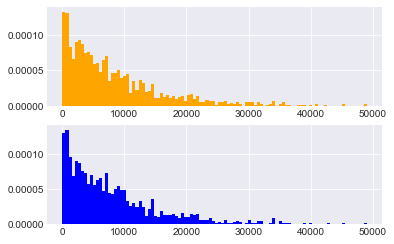

In [5]:
ipt_dt = [y_train,y_test]
# ipt_dt = [dlt75,dmt75]
n = 7


# fig , ax = plt.subplots(2,1, sharex=True)
fig , ax = plt.subplots(2,1)


for tar_cls, i in zip(ipt_dt, [0,1]):
    """
    st_temp = pd.DataFrame(tar_cls[col_lst[n]].describe())
    st_lst =[]
    st_lst.append(st_temp.loc["mean", col_lst[n]])
    st_lst.append(st_temp.loc["std", col_lst[n]])
    """
    # X =np.array(tar_cls[col_lst[n]])
    X =np.array(tar_cls)

    # norm_pdf = stats.norm.pdf(x=X, loc=st_lst[0], scale=st_lst[1]) # 期待値=st0, 標準偏差=st1
    
    
    if i == 0:
        # plt.plot(X, norm_pdf, color="orange")
        ax[0].hist(X, bins=100, color="orange", density=True)
    else:
        # plt.plot(X, norm_pdf, color="blue")
        ax[1].hist(X, bins=100, color="blue", density=True)

    # plt.xlabel("確率変数X", fontsize=13)
    # plt.ylabel("確率密度pdf", fontsize=13)
# print(f"column: {col_lst[n]}")
plt.show()

### 重回帰

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# モデル作成
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# 評価
## 学習データへの当てはまり具合
print("MAE_train:", mean_absolute_error(y_train, reg.predict(X_train)))
## テストデータの誤差
print("MAE_test:", mean_absolute_error(y_test, reg.predict(X_test)))

MAE_train: 5070.507823552472
MAE_test: 5090.393152280513


In [5]:
from fastFM import als


ImportError: cannot import name 'ffm' from 'fastFM' (c:\Users\kyotn\workspace\その他\Data_Analytics\Factotization_Machine\fastFM\__init__.py)

### Fast FM

In [ ]:
from fastFM import als
from scipy.sparse import csr_matrix

# モデル作成
fm = als.FMRegression(n_iter=1000, init_stdev=0.1, rank=8, l2_reg_w=0.5, l2_reg_V=0.5, random_state=810)
fm.fit(csr_matrix(X_train), y_train)

# 評価
## 学習データへの当てはまり具合
mean_absolute_error(y_train, fm.predict(csr_matrix(X_train)))
## テストデータの誤差
mean_absolute_error(y_test, fm.predict(csr_matrix(X_test)))

In [10]:
import factorization_machine as fm

In [12]:
FM = fm.FactorizationMachine()
# fm.fit(X_train,y_train)

TypeError: __init__() missing 7 required positional arguments: 'embedding_size', 'l2_weight', 'learning_rate', 'batch_size', 'epoch_size', 'test_size', and 'scope_name'